In [2]:
import seaborn as sb
import scipy
import math
import statistics as stat
import numpy as np
import matplotlib.pyplot as plt
import statistics as stat

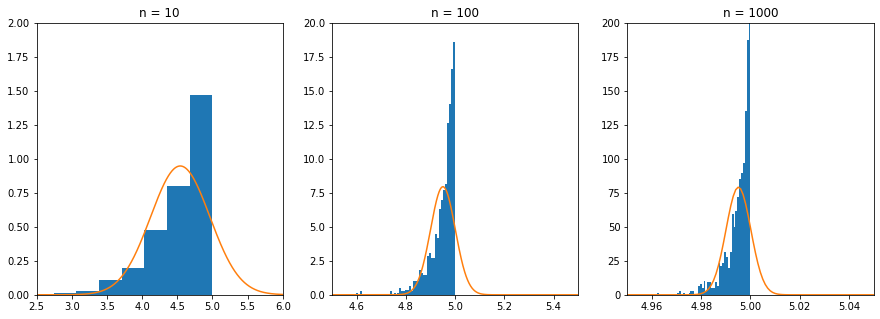

In [3]:
#6.1(a)
teta = 5
n = [10, 100, 1000]
k = 1000
figure, axis = plt.subplots(1, 3, figsize=(15, 5))
t = np.arange(teta/2, teta+1, 0.001)
for i in range(len(n)):
    x = 0
    x = np.array([scipy.stats.uniform.rvs(scale=teta,size=n[i]) for l in range(k)])
    x = x.max(axis=1)
    E = x.mean()
    D = x.std()
    norm = scipy.stats.norm.pdf((t-E)/D)/D
    axis[i].hist(x, density=True,bins=min(n[i],50))
    axis[i].plot(t,norm)
    axis[i].set_title("n = "+str(n[i]))
axis[0].set_xlim([teta/2, teta+1])
axis[0].set_ylim([0,n[0]/5])
axis[1].set_xlim([4.5, 5.5])
axis[1].set_ylim([0,n[1]/5])
axis[2].set_xlim([4.95, 5.05])
axis[2].set_ylim([0,n[2]/5])
plt.show()

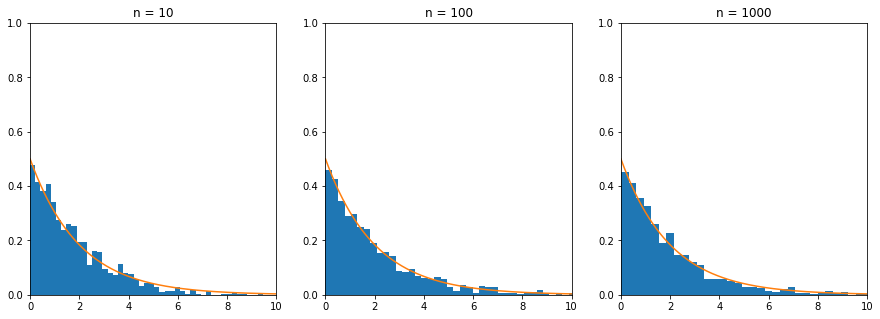

In [4]:
#6.1(b)
teta = 2
n = [10, 100, 1000]
k = 1000
figure, axis = plt.subplots(1, 3, figsize=(15, 5))
t = np.arange(0, 10 * teta,0.01)
for i in range(len(n)):
    x = np.array([scipy.stats.uniform.rvs(scale=teta,size=n[i]) for t in range(k)])
    x = x.max(axis=1)
    x = np.array([n[i] * (teta - y) for y in x])
    exp = scipy.stats.expon.pdf(t,scale=teta)
    axis[i].hist(x, density=True,bins=round(k/20))
    axis[i].plot(t,exp)
    axis[i].set_title("n = "+str(n[i]))
    axis[i].set_xlim([0,teta * 5])
    axis[i].set_ylim([0,1])
plt.show()

In [4]:
#6.1(d)
teta = 2
n = [10, 100, 1000]
k = 1000
for i in range(len(n)):
    uni = scipy.stats.uniform.rvs(size=k)
    x = np.array([scipy.stats.uniform.rvs(scale=teta,size=n[i]) for t in range(k)])
    maximum = (n[i] + 1) / n[i] * x.max(axis=1)
    mean = 2 * x.mean(axis=1)
    m = 0
    for j in range(k):
        if abs(maximum[j] - teta) < abs(mean[j] - teta):
            m += 1
    print('for n =',str(n[i]),':', round(m/k,3))
    

for n = 10 : 0.733
for n = 100 : 0.898
for n = 1000 : 0.969


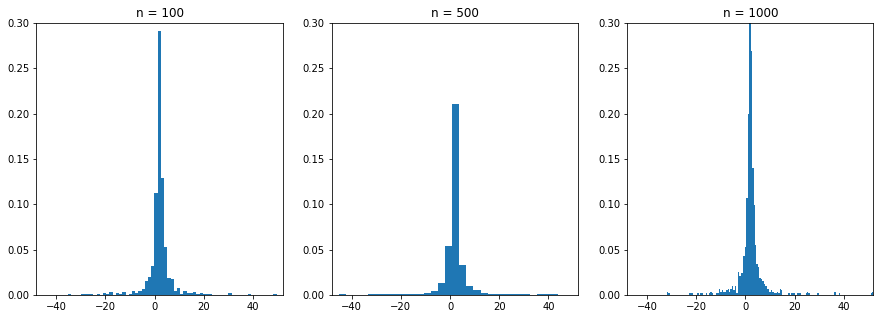

In [6]:
#6.2(a)
teta = 2
n = [100, 500,1000]
k = 1000
figure, axis = plt.subplots(1, 3, figsize=(15, 5))
t = np.arange(-10+teta,10+teta,0.01)
for i in range(len(n)):
    x = np.array([scipy.stats.cauchy.rvs(loc=teta,size=n[i]) for t in range(k)])
    x = x.mean(axis=1)
    axis[i].hist(x, density=True,bins=k)
    axis[i].set_title("n = "+str(n[i]))
    axis[i].set_xlim([-50+teta,50+teta])
    axis[i].set_ylim([0,0.3])
plt.show()

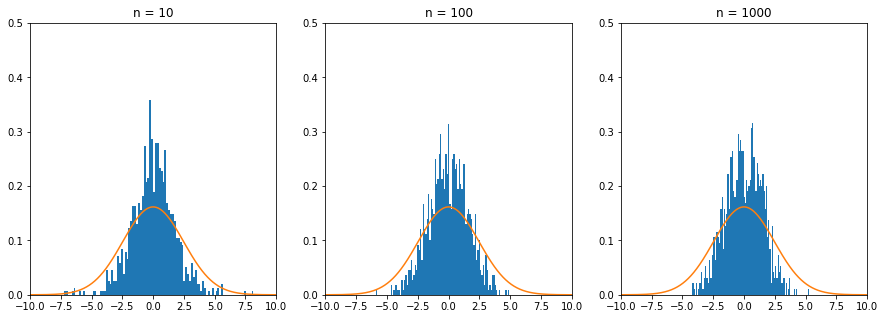

In [7]:
#6.2(b)
def f(x, teta):
    return 1/(math.pi * (1 + (x - teta)**2))
teta = 2
n = [10, 100, 1000]
k = 1000
figure, axis = plt.subplots(1, 3, figsize=(15, 5))
t = np.arange(-10,10,0.01)
for i in range(len(n)):
    x = np.array([scipy.stats.cauchy.rvs(loc=teta,size=n[i]) for t in range(k)])
    x = np.median(x, axis=1)
    x = np.sqrt(n[i]) * (x - teta)
    x_med = scipy.stats.cauchy.ppf(1/2, loc=teta)
    D = 1 / (4 * f(x_med, teta) ** 2)
    norm = scipy.stats.norm.pdf(t / D) / D
    axis[i].hist(x, density=True,bins=round(k/10))
    axis[i].plot(t,norm)
    axis[i].set_title("n = "+str(n[i]))
    axis[i].set_xlim([-10,10])
    axis[i].set_ylim([0,0.5])
plt.show()

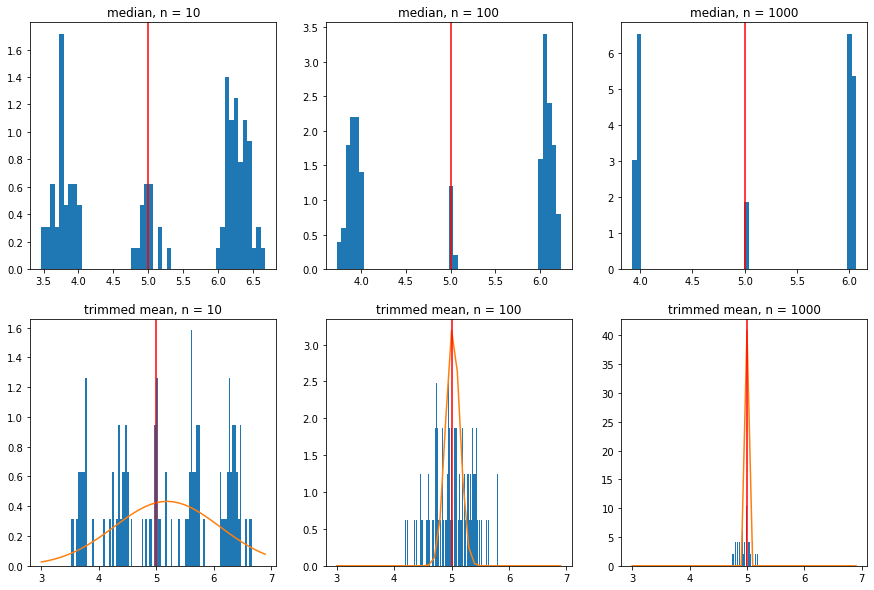

In [12]:
#6.4
teta = 5
N = [10,100,1000]
k = 100
i = 0
l = 0
figure, axis = plt.subplots(2, 3, figsize=(15, 10))
for n in N:
    x = []
    for u in range(k):
        row = []
        for v in range(n):
            bern = scipy.stats.bernoulli.rvs(1/2,size=1)[0]
            if bern == 0:
                row.append(scipy.stats.uniform.rvs(loc=teta-2,size=1)[0])
            else:
                row.append(scipy.stats.uniform.rvs(loc=teta+1,size=1)[0])
        x.append(row)
    x = np.array(x)
    y = np.median(x,axis=1)
    z = scipy.stats.trim_mean(x,0.3,axis=1)
    axis[0,i].hist(y, density=True,bins=round(k/2))
    axis[0,i].set_title("median, n = "+str(n))
    axis[0,i].axvline(teta,color='red')
    axis[1,i].hist(z, density=True,bins=round(k))
    a1 = np.arange(3,7,0.1)
    x1 = scipy.stats.norm.pdf(a1,loc=z.mean(),scale=stat.variance(z))
    axis[1,i].plot(a1,x1)
    axis[1,i].set_title("trimmed mean, n = "+str(n))
    axis[1,i].axvline(teta,color='red')
    i += 1
plt.show()

 D of median: 1.0
 D of mean: 2.0
 D pf trim_mean 0.1: 1.044
 D of trim_mean 0.3: 0.824


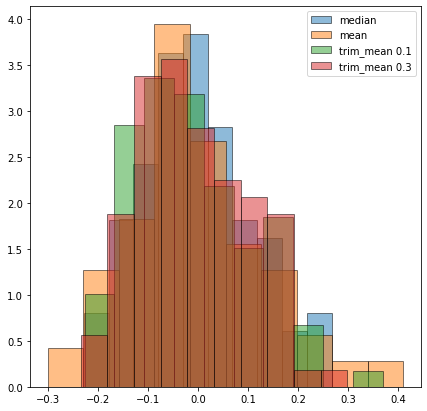

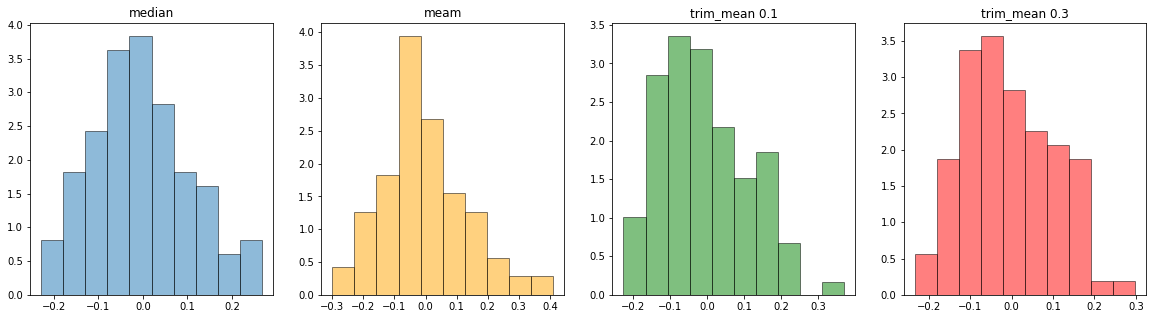

In [13]:
#6.5
n = 100
k = 100
x = np.array([scipy.stats.laplace.rvs(size=n) for u in range(k)])
f_med = 1/2 #med = 0, f(x) = 1/2 e^(-|x|) => f(0) = 1/2
med = np.median(x,axis=1)
mean = np.mean(x,axis=1)
D_med = 1.0 / (4 * (f_med) ** 2)
tm_01 = scipy.stats.trim_mean(x, 0.1,axis=1)
tm_03 = scipy.stats.trim_mean(x, 0.3,axis=1)
def I(x):
    return (2 - math.exp(-x) * (x * (x + 2) + 2))
x_01 = scipy.stats.laplace.ppf(1-0.1)
x_03 = scipy.stats.laplace.ppf(1-0.3)
D_01 = np.sqrt(1.0/((1 - 2 * 0.1)**2) * (I(x_01) + 0.1 * (x_01) ** 2))
D_03 = np.sqrt(1.0/((1 - 2 * 0.3)**2) * (I(x_03) + 0.3 * (x_03) ** 2))
D_def = 2.0

print(' D of median:',D_med)
print(' D of mean:',D_def)
print(' D pf trim_mean 0.1:',round(D_01,3))
print(' D of trim_mean 0.3:',round(D_03,3))

fig, ax = plt.subplots(figsize=(7, 7))
ax.hist(med,density=True,alpha=0.5,label='median',edgecolor = "black")
ax.hist(mean,density=True,alpha=0.5,label='mean',edgecolor = "black")
ax.hist(tm_01,density=True,alpha=0.5,label='trim_mean 0.1',edgecolor = "black")
ax.hist(tm_03,density=True,alpha=0.5,label='trim_mean 0.3',edgecolor = "black")
ax.legend()
plt.show()

fig, ax = plt.subplots(1,4,figsize=(20, 5))
ax[0].hist(med,density=True,alpha=0.5,label='median',edgecolor = "black")
ax[0].set_title('median')
ax[1].hist(mean,density=True,alpha=0.5,label='mean',edgecolor = "black",color='orange')
ax[1].set_title('meam')
ax[2].hist(tm_01,density=True,alpha=0.5,label='trim_mean 0.1',edgecolor = "black",color='green')
ax[2].set_title('trim_mean 0.1')
ax[3].hist(tm_03,density=True,alpha=0.5,label='trim_mean 0.3',edgecolor = "black",color='red')
ax[3].set_title('trim_mean 0.3')
plt.show()